<div style="text-align:center"><img src="assets/intro.jpg"/></div>

# <span style="color:#264896">Mission 3 : Régression logistique</span>

### <span style="color:#17aafa">Sommaire</span>

1. [Régression logistique avec statsmodels](#statsmodels)     
2. [Régression logistique avec Scikit-learn](#scikit)     
3. [Comparaison des résultats des 2 méthodes](#compare)    
4. [Tests complémentaires avec Scikit-learn](#compl)    
    1. [Matrice de confusion](#conf)    
    2. [Distribution des probabiltés](#dist_prob)    
    3. [Courbe ROC](#roc)    
    4. [Précision et rappel](#recall)
    
Des tests seront ensuite réalisés en fin de notebook sur le fichier exemple fourni. Les résulats sont fournis dans la partie [Tests de l'algorithme Scikit-learn sur le fichier exemple](#test-sklearn)

### <span style="color:#17aafa" id="statsmodels">Régression logistique avec statsmodels</span>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#importation du fichier de données
dataset = pd.read_csv("datas/notes.csv", sep=",", decimal=".", header=0)
dataset.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


Pour le traitement, nous allons transformer la variable is_genuine pour :
- **True = 0**
- **False = 1**

In [3]:
dataset['is_genuine'] = dataset['is_genuine'].apply(lambda x: 0 if x == True else 1)
dataset["is_genuine"] = dataset["is_genuine"].astype('category')

Nous allons ensuite **subdiviser notre jeu de données** pour obtenir un échantillon de test et un echantillon d'entrainement :

In [4]:
# on définit x et y
y = dataset["is_genuine"].cat.codes
X = dataset.select_dtypes(np.number)

In [5]:
from sklearn import model_selection

#subdivision des données
X_train,X_test,y_train,y_test = model_selection.train_test_split (X,y,test_size = 0.2 ,random_state=0)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(136, 6) (34, 6) (136,) (34,)


Statsmodels décide par défaut qu’il n’y a pas de constante, il faudrait donc ajouter une colonne dans les données pour la constante car tout nos prédicteurs sont continus. 
Cependant, les valeurs contenues dans x sont théoriquement toujours dans une fourchette précise *(il s'agit des côtes des billets)* et ne pourront jamais être égale à 0.
**Nous n'allons donc pas ajouter de constante dans ce cas précis**.

In [6]:
# nous n'ajoutons pas de colonne pour la constante
#X_train = sm.add_constant(X_train)

In [7]:
# on ajuste le modèle
modele_sm = sm.Logit(y_train, X_train)
result = modele_sm.fit(method='bfgs')

         Current function value: 0.023165
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40


C:\Users\OpenClassrooms\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [8]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  136
Model:                          Logit   Df Residuals:                      130
Method:                           MLE   Df Model:                            5
Date:                Wed, 16 Sep 2020   Pseudo R-squ.:                  0.9658
Time:                        09:37:07   Log-Likelihood:                -3.1505
converged:                      False   LL-Null:                       -92.139
Covariance Type:            nonrobust   LLR p-value:                 1.447e-36
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
diagonal         0.8123      3.307      0.246      0.806      -5.669       7.293
height_left      2.9633     11.037      0.268      0.788     -18.669      24.595
height_right     3.1818      7.822      0.40

Nous allons à présent **effectuer les prédictions sur la base de test** :

In [9]:
X_test['prediction_sm'] = round((result.predict(X_test)*100),2)
X_test

,diagonal,height_left,height_right,margin_low,margin_up,length,prediction_sm
133,171.69,104.17,104.37,5.31,3.54,111.89,100.00
136,171.69,103.87,104.16,5.46,3.31,111.42,100.00
168,171.82,103.97,103.88,4.73,3.55,111.87,99.89
54,171.62,103.49,103.58,3.95,3.00,113.10,0.00
56,172.53,103.99,103.55,4.50,3.10,113.03,0.02
144,171.56,103.80,103.87,5.66,2.98,112.95,99.97
7,171.58,103.65,103.37,3.54,3.19,113.38,0.00
96,172.00,104.32,104.26,4.53,3.04,112.93,0.85
121,172.07,104.50,104.23,6.19,3.07,111.21,100.00
97,171.49,103.77,103.60,4.01,3.09,112.95,0.00


In [10]:
X_test['prediction_sm'].describe()

count     34.000000
mean      41.176765
std       49.840619
min        0.000000
25%        0.000000
50%        0.065000
75%      100.000000
max      100.000000
Name: prediction_sm, dtype: float64

### <span style="color:#17aafa" id="scikit">Régression logistique avec Scikit-learn / Scoring</span>

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
#regression logistique
lr = LogisticRegression()
#modélisation sur les données d'apprentissage
modele_sk = lr.fit(X_train, y_train)

In [13]:
print(modele_sk)

LogisticRegression()


In [14]:
#calcul des probabilités d'affectation sur l'échantillon test
probas = lr.predict_proba(X_test[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
print(probas)

[[3.20474847e-02 9.67952515e-01]
 [1.63332609e-02 9.83666739e-01]
 [2.01164842e-01 7.98835158e-01]
 [9.90846314e-01 9.15368642e-03]
 [9.16782505e-01 8.32174950e-02]
 [3.72104438e-01 6.27895562e-01]
 [9.98012929e-01 1.98707081e-03]
 [8.07142981e-01 1.92857019e-01]
 [1.21137288e-03 9.98788627e-01]
 [9.80743756e-01 1.92562439e-02]
 [6.43943906e-02 9.35605609e-01]
 [8.01588244e-01 1.98411756e-01]
 [9.65866373e-01 3.41336272e-02]
 [5.62011640e-02 9.43798836e-01]
 [9.77492515e-01 2.25074853e-02]
 [9.92463954e-01 7.53604585e-03]
 [9.93013307e-01 6.98669264e-03]
 [2.41618636e-03 9.97583814e-01]
 [9.81081121e-01 1.89188794e-02]
 [9.76499578e-01 2.35004216e-02]
 [7.84065457e-04 9.99215935e-01]
 [9.66069821e-01 3.39301786e-02]
 [2.93425882e-01 7.06574118e-01]
 [1.17962858e-02 9.88203714e-01]
 [3.97668815e-02 9.60233119e-01]
 [9.97136407e-01 2.86359306e-03]
 [9.89112341e-01 1.08876593e-02]
 [2.57899582e-02 9.74210042e-01]
 [9.89721057e-01 1.02789435e-02]
 [9.85357525e-01 1.46424750e-02]
 [8.376018

In [15]:
#score de presence : Probalilité de chance que le billet soit FAUX (is_genuine = 1)
score = probas[:,1]
print(score)

[0.96795252 0.98366674 0.79883516 0.00915369 0.08321749 0.62789556
 0.00198707 0.19285702 0.99878863 0.01925624 0.93560561 0.19841176
 0.03413363 0.94379884 0.02250749 0.00753605 0.00698669 0.99758381
 0.01891888 0.02350042 0.99921593 0.03393018 0.70657412 0.98820371
 0.96023312 0.00286359 0.01088766 0.97421004 0.01027894 0.01464247
 0.16239815 0.92691667 0.02303658 0.01004206]


In [16]:
X_test["probas_faux_sk"] = score
X_test

,diagonal,height_left,height_right,margin_low,margin_up,length,prediction_sm,probas_faux_sk
133,171.69,104.17,104.37,5.31,3.54,111.89,100.00,0.967953
136,171.69,103.87,104.16,5.46,3.31,111.42,100.00,0.983667
168,171.82,103.97,103.88,4.73,3.55,111.87,99.89,0.798835
54,171.62,103.49,103.58,3.95,3.00,113.10,0.00,0.009154
56,172.53,103.99,103.55,4.50,3.10,113.03,0.02,0.083217
144,171.56,103.80,103.87,5.66,2.98,112.95,99.97,0.627896
7,171.58,103.65,103.37,3.54,3.19,113.38,0.00,0.001987
96,172.00,104.32,104.26,4.53,3.04,112.93,0.85,0.192857
121,172.07,104.50,104.23,6.19,3.07,111.21,100.00,0.998789
97,171.49,103.77,103.60,4.01,3.09,112.95,0.00,0.019256


On constate que les 2 méthodes apportent un résultat similaire pour la prévision de la variable *is_genuine*.    
**Nous allons ajouter la variable réelle pour comparer les résultats** :

### <span style="color:#17aafa" id="compare">Comparaison des résultats des 2 méthodes</span>

In [17]:
df_verif = pd.merge(dataset.reset_index(),X_test.reset_index(),on="index", how="right")[["index","is_genuine","prediction_sm","probas_faux_sk"]]
df_verif

,index,is_genuine,prediction_sm,probas_faux_sk
0,4,0,0.00,0.033930
1,5,0,0.94,0.198412
2,7,0,0.00,0.001987
3,8,0,0.00,0.010042
4,18,0,0.00,0.007536
5,26,0,0.00,0.014642
6,33,0,0.11,0.162398
7,37,0,0.00,0.002864
8,44,0,0.00,0.023037
9,45,0,0.00,0.010279


Les 2 méthodes de prévision se montrent fiables sur ce jeu de test. Attention cependant, la taille de l'échantillon est relativement petit et les composantes principales très marquées.

On remarque également que **les points qui présentaient des différences avec le Kmeans *(les losanges rouges limitrophes de l'ACP)*, comme les individus 144, 96 et 5 par exemple, ont été correctement prédit par l'algorithme**.

### <span style="color:#17aafa" id="compl">Tests complémentaires avec Scikit-learn</span>

#### <span style="color:#264896" id="conf">Matrice de confusion</span>

In [18]:
from sklearn.metrics import confusion_matrix
X_test = X_test[["diagonal","height_left","height_right","margin_low","margin_up","length"]]
conf_matrix = confusion_matrix(y_test, lr.predict(X_test))
df_conf = pd.DataFrame(conf_matrix, columns=['réel Vrai',"réel Faux"])
df_conf.index = ['prédit Vrai',"prédit Faux"]
df_conf

,réel Vrai,réel Faux
prédit Vrai,20,0
prédit Faux,0,14


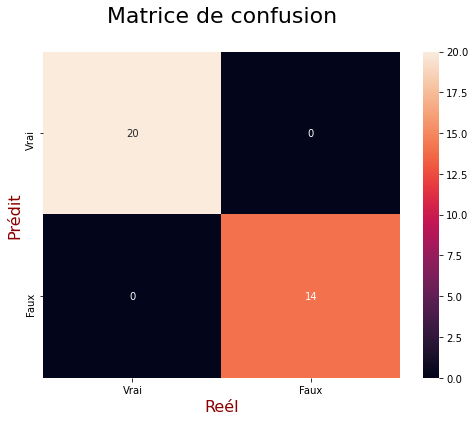

In [19]:
#Affichage avec Seaborn
fig = plt.figure(figsize=(8,6))
sn.heatmap(conf_matrix, annot=True, xticklabels=["Vrai","Faux"], yticklabels=["Vrai","Faux"])

font = {'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.xlabel("Reél", fontdict=font)
plt.ylabel("Prédit", fontdict=font)
plt.title("Matrice de confusion\n", fontsize=22)
plt.show()
fig.savefig('graph/LOGIT_matrice_confusion.png')

Les chiffres sur la diagonale indiquent les éléments bien classés à savoir les **vrais positifs et vrais négatifs**.    
Regardons comment les probabilités sont distribués :

#### <span style="color:#264896" id="dist_prob">Distribution des probabiltés</span>

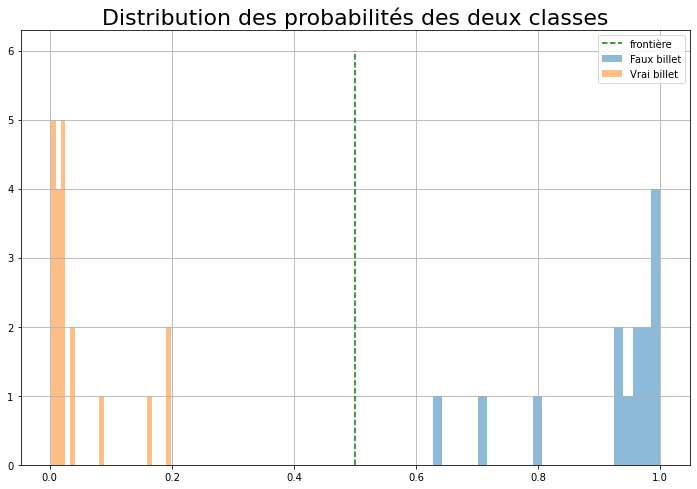

In [20]:
df_proba = pd.DataFrame(score, columns=['proba'])
df_proba['is_genuine'] = y_test.values

fig = plt.figure(figsize=(12,8))
df_proba[df_proba['is_genuine'] == 1]['proba'].hist(bins=25, label='Faux billet', alpha=0.5)
df_proba[df_proba['is_genuine'] == 0]['proba'].hist(bins=25, label='Vrai billet', alpha=0.5)
plt.plot([0.5, 0.5], [0, 6], 'g--', label="frontière")
plt.title('Distribution des probabilités des deux classes', fontsize=22)
plt.legend()
fig.savefig('graph/LOGIT_distri_probas.png')

Plus l’aire commune aux deux distributions est petite, plus le modèle est confiant. Cette aire commune est reliée à la **courbe ROC**. On remarque ici qu'il n'y a aucune aire commune.

#### <span style="color:#264896" id="roc">Courbe ROC</span>

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

fpr1, tpr1, seuil1 = roc_curve(y_test, probas[:, 1], pos_label=lr.classes_[1], drop_intermediate=False)
df_truepos = pd.DataFrame(dict(fpr=fpr1, tpr=tpr1, seuil=seuil1)).copy()
df_truepos.sample(10)

,fpr,tpr,seuil
31,0.85,1.000000,0.007536
13,0.00,0.928571,0.706574
0,0.00,0.000000,1.999216
27,0.65,1.000000,0.010888
26,0.60,1.000000,0.014642
7,0.00,0.500000,0.967953
1,0.00,0.071429,0.999216
18,0.20,1.000000,0.083217
12,0.00,0.857143,0.798835
25,0.55,1.000000,0.018919


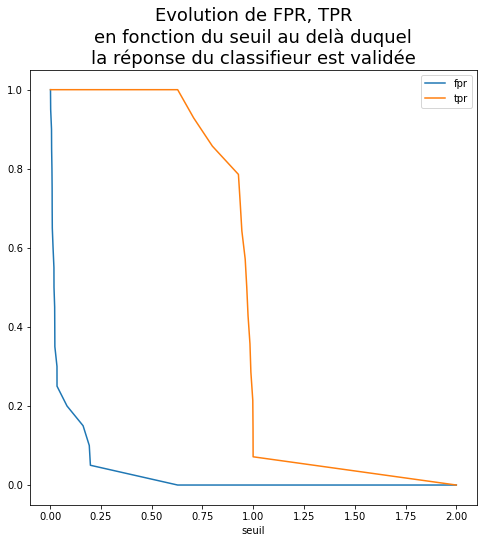

In [22]:
ax = df_truepos.plot(x="seuil", y=['fpr', 'tpr'], figsize=(8, 8))
ax.set_title("Evolution de FPR, TPR\nen fonction du seuil au delà duquel\n" +
             "la réponse du classifieur est validée", fontsize=18);
plt.show()

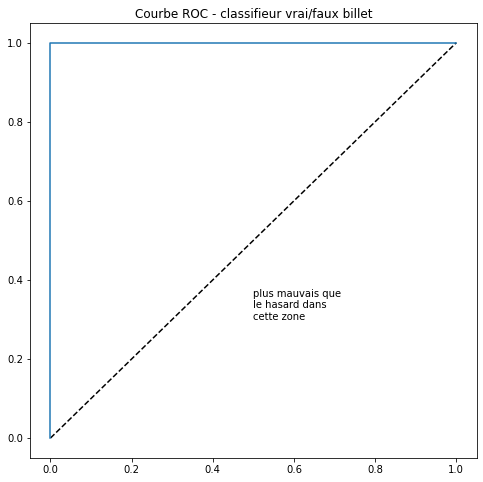

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr1, tpr1) 
ax.plot(fpr1, tpr1)
ax.set_title('Courbe ROC - classifieur vrai/faux billet')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
plt.show()
fig.savefig('graph/LOGIT_courbe_ROC.png')

La mesure AUC est l’aire sous la courbe. Elle représente la probabilité que le score d’un exemple classé *faux* à raison soit inférieur à un exemple classé *faux* à tort.

In [24]:
print("La mesure AUC est ici égale à",round(aucf,2))

La mesure AUC est ici égale à 1.0


#### <span style="color:#264896" id="recall">Précision et rappel</span>

On peut déterminer un seuil ***s*** au delà duquel la réponse est validée avec une bonne confiance. Parmi toutes les réponses validées, **la précision** est le nombre de réponses correctes rapporté au nombre de réponses validées, le **rappel** *(recall)* est le nombre de réponses correctes rapportées à toutes qui aurait dû être validées. On calcule aussi la métrique F1 qui est une sorte de moyenne entre les deux.

In [46]:
from sklearn.metrics import precision_recall_curve
precision, rappel, seuil = precision_recall_curve(y_test, probas[:, 1], pos_label=lr.classes_[1])
df_prre = pd.DataFrame(dict(precision=precision, rappel=rappel,
                             seuil=[0] + list(seuil)))
df_prre['F1']= 2 * (df_prre.precision * df_prre.rappel) / (df_prre.precision + df_prre.rappel)
df_prre.head(15)

,precision,rappel,seuil,F1
0,1.0,1.000000,0.000000,1.000000
1,1.0,0.928571,0.627896,0.962963
2,1.0,0.857143,0.706574,0.923077
3,1.0,0.785714,0.798835,0.880000
4,1.0,0.714286,0.926917,0.833333
5,1.0,0.642857,0.935606,0.782609
6,1.0,0.571429,0.943799,0.727273
7,1.0,0.500000,0.960233,0.666667
8,1.0,0.428571,0.967953,0.600000
9,1.0,0.357143,0.974210,0.526316


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = lr.predict(X_test)

#Autres métriques d'évaluation du modèle
print('  - Precision: ' +str(round(precision_score(y_test, y_pred)*100, 2)), '%')
print('  - Recall: ' +str(round(recall_score(y_test, y_pred)*100, 2)), '%')
print('  - F1 score: ' +str(round(f1_score(y_test, y_pred)*100, 2)), '%')

  - Precision: 100.0 %
  - Recall: 100.0 %
  - F1 score: 100.0 %


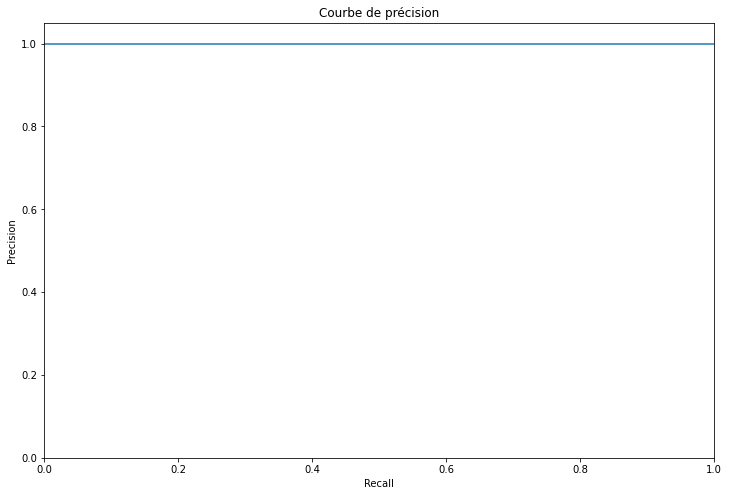

In [37]:
plt.figure(figsize=(12,8))
plt.step(df_prre["rappel"], df_prre["precision"], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Courbe de précision")
plt.show()

# <span style="color:#264896" id="test-sklearn">Tests de l'algorithme Scikit-learn sur le fichier exemple</span>

Nous allons à présent vérifier l'algorithme de prédiction sur un jeu de données inconnues.

In [27]:
#importation du fichier exemple
dataset_new = pd.read_csv("datas/example.csv", sep=",", decimal=".", header=0)
dataset_new

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [28]:
#creation des variables et identifiants
X_new = dataset_new[["diagonal","height_left","height_right","margin_low","margin_up","length"]]
id_new = dataset_new[["id"]]

In [29]:
#calcul des probabilités d'affectation sur l'échantillon exemple
probas_new = lr.predict_proba(X_new)
print(probas_new)

[[0.05100625 0.94899375]
 [0.01362652 0.98637348]
 [0.03424218 0.96575782]
 [0.86732434 0.13267566]
 [0.99529364 0.00470636]]


In [30]:
#score de presence : Probalilité de chance que le billet soit FAUX (is_genuine = 1)
score_new = probas_new[:,1]
print(score_new)

[0.94899375 0.98637348 0.96575782 0.13267566 0.00470636]


In [31]:
#affichage du dataframe final
dataset_new["proba_false"] = score_new
dataset_new

,diagonal,height_left,height_right,margin_low,margin_up,length,id,proba_false
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0.948994
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.986373
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0.965758
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0.132676
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,0.004706


Si la **probabilité de "faux" est supérieur à 0.5, alors le billet est considéré comme faux** :

In [32]:
#calcul de la variable is_genuine
dataset_new["is_genuine"] = np.where(dataset_new["proba_false"]>=0.5, 'Non', 'Oui')
dataset_new

,diagonal,height_left,height_right,margin_low,margin_up,length,id,proba_false,is_genuine
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0.948994,Non
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.986373,Non
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0.965758,Non
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0.132676,Oui
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,0.004706,Oui


In [33]:
#traitement du Dataframe pour meilleure compréhension :
dataset_new_fin = dataset_new[["id","proba_false","is_genuine"]].rename(columns={"id":"Identifiant du billet testé",
                                                                                 "proba_false":"Probabilité de faux billet (%)",
                                                                                 "is_genuine":"Est authentique ?"})
dataset_new_fin["Probabilité de faux billet (%)"] = round((dataset_new_fin["Probabilité de faux billet (%)"]*100),2)
dataset_new_fin

,Identifiant du billet testé,Probabilité de faux billet (%),Est authentique ?
0,A_1,94.90,Non
1,A_2,98.64,Non
2,A_3,96.58,Non
3,A_4,13.27,Oui
4,A_5,0.47,Oui


Nous avons donc testé un fichier exemple, contenant des données inconnues, afin de vérifier si notre algorithme de prédiction est fiable.
A présent, nous allons isoler la procédure dans un nouveau Notebook afin de tester des fichiers externes. Le script est disponible dans [P6_04_prog_test.ipynb](P6_04_prog_test.ipynb)